In [40]:
import time
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from sklearn.preprocessing import StandardScaler

rng = np.random.RandomState(0)

0.00316**2 + 0.676**2 * RBF(length_scale=87.2) + WhiteKernel(noise_level=2.83e-05)


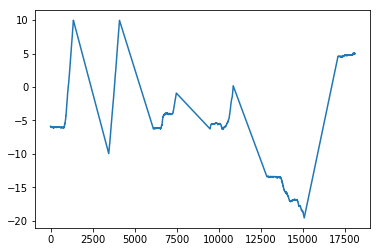

In [60]:
data = pd.read_csv('/Users/sotainoue1/uavTracker/filter/filter_test.csv',sep=",")
#data = pd.read_csv('/Users/sotainoue1/uavTracker/filter/kekka_average.csv',sep=",")
time = data.iloc[1:8000:3,0]
xpo = data.iloc[1:8000:3,3]

plt.plot(time,xpo) #check original plot

xpo_1 = np.atleast_2d(xpo).T   #convert data type to 2d array 
time_1 = np.atleast_2d(time).T

scaler_xpo = StandardScaler().fit(xpo_1) #Scaling


kernel = ConstantKernel() + 1* RBF(100) + WhiteKernel() #modeling Gaussian process
gpr = GPR(kernel=kernel, alpha=0) #when use whiteKernel, alpha must be 0

gpr.fit(time_1, scaler_xpo.transform(xpo_1))
print(gpr.kernel_)

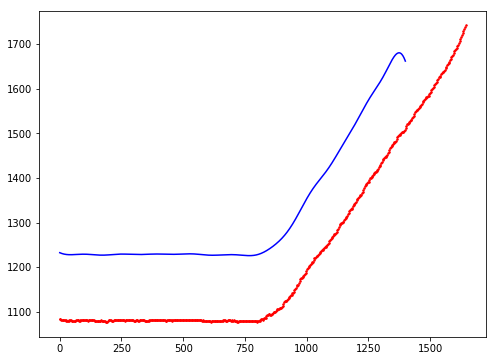

In [75]:
# prediction mean value and standard deviation of test data set 
test_data = pd.read_csv('/Users/sotainoue1/uavTracker/filter/all_event.csv',sep=",")
x_test = test_data.iloc[0:1645:3,8]
time_test = test_data.iloc[0:1645:3,1]

x_test_1 =  np.atleast_2d(x_test).T
time_test_1 = np.atleast_2d(time_test).T

scaler_x_test_1 = StandardScaler().fit(x_test_1)

plot_X = np.atleast_2d(np.linspace(0, 1400, 1000)).T
pred_mu, pred_sigma = gpr.predict(plot_X, return_std=True)
pred_mu = scaler_x_test_1.inverse_transform(pred_mu)
pred_sigma = pred_sigma.reshape(-1, 1) * scaler_x_test_1.scale_

#graphic 
fig = plt.figure(figsize=(8, 6))

plt.plot(plot_X,pred_mu,'b') #plot of prediction 
plt.plot(time_test_1, x_test_1,'r.', markersize=3) #plot of  test data set
#plt.xlim(1040,1080)
plt.show()


#plt.savefig("fig_1011.png", dpi = 320,facecolor = "white", tight_layout = True)